# Homework 3 

# Option #1

In [2]:
#Importing all the useful libraries
import pandas as pd
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt


In [15]:
df = pd.read_csv("IL_Building_Inventory.csv")
df.head()
df.columns
df.dtypes

Agency Name                object
Location Name              object
Address                    object
City                       object
Zip code                    int64
County                     object
Congress Dist               int64
Congressional Full Name    object
Rep Dist                    int64
Rep Full Name              object
Senate Dist                 int64
Senator Full Name          object
Bldg Status                object
Year Acquired               int64
Year Constructed            int64
Square Footage              int64
Total Floors                int64
Floors Above Grade          int64
Floors Below Grade          int64
Usage Description          object
Usage Description 2        object
Usage Description 3        object
dtype: object

In [ ]:
df = pd.read_csv("IL_Building_Inventory.csv",na_values = {'Year Acquired': 0, 'Year Constructed': 0, 'Square Footage': 0})

In [ ]:
df

In [ ]:
df["Agency Name"].nunique()


In [7]:
df_clean = df.dropna()

In [ ]:
df_clean.isna() #dropping all the rows with na values in any column 

<h4>Question 1 : Relationship between the year acquired and the year constructed 



Before drawing the image I expected that it will be a mostly linear.

In [ ]:
 # Approach 1 
    
color_diff = np.where(df_clean['Year Acquired']!=df_clean['Year Constructed'],'r',np.where(df_clean['Year Acquired']==df_clean['Year Constructed'],'g','r'))
graph = df_clean.plot(x="Year Acquired",y = "Year Constructed",figsize=(10,10), c = color_diff , kind="scatter" , title="Acquired year VS Construction year")

#color_diff


In [ ]:
"""#Approach 2 
color_diff = np.where(df_clean['Year Acquired']!=df_clean['Year Constructed'],'r'
                      ,np.where(df_clean['Year Acquired']==df_clean['Year Constructed'],'g','r'))
plt.scatter(df_clean['Year Acquired'], df_clean['Year Constructed'], c = color_diff, marker = '.',label = 'Acquired year VS Construction year')
plt.xlabel('Year Acquried')
plt.ylabel('Year Constructed')
plt.legend()
"""

We can see a clear linear trend in the graph depecticed by the green line. 
However, there are a lot of data points where the acquired year is not same as the constuction year. Those points are plotted in red for clear distinction. 
This visualization does well in capturing and differentiating between regular linear points (green) and stray point (red) 

<h4>Question 2 : Total square footage as a function of congressional district ("Congress Dist")

In [ ]:
congbu=df_clean.groupby("Congress Dist")['Square Footage'].sum()
congbu

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(congbu, marker='.', linewidth=2.0 , label = 'Total square footage for each dist')
ax.set_xlabel('Congress Dist') # year acquired, shorthanded to "year"
ax.set_ylabel('Square Footage')


In [ ]:
plt.bar(congbu.index, congbu.values)
plt.xlabel('Congressional District')
plt.ylabel('Total Square Footage')
plt.show()

The above visualization caputres the Total square footage as a function of congressional district. It is line plot and the bar plot are 2 different visuals for same task. 

Success : The bar graph displays Total square footage for each district 

Shortcoming : The scale on y axis is in 10 power 7. It is not very easy to understand 

<h4> Question 3 : Average square footage per floor as a function of congressional district

In [26]:
congbuavg = df_clean.groupby('Congress Dist')['Square Footage', "Total Floors"].agg(sum)#/sum("Total Floors")})
                                                                                     #"Total Floors":np.sum()})
congbuavg["Square Footage per floor"] = congbuavg["Square Footage"]/ congbuavg["Total Floors"]
#congbuavg= congbuavg["Square Footage per floor"]
congbuavg

,Square Footage,Total Floors,Square Footage per floor
Congress Dist,,,
1,2347969,133,17653.902256
2,6077683,637,9541.103611
3,1293687,72,17967.875000
4,311021,20,15551.050000
5,1809022,113,16009.044248
6,145659,28,5202.107143
7,9199651,516,17828.781008
8,1457719,310,4702.319355
9,77978,11,7088.909091


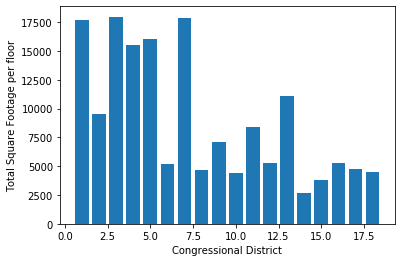

In [31]:
plt.bar(congbuavg.index, congbuavg["Square Footage per floor"], label= "Avg Square Footage vs Congress district")
plt.xlabel('Congressional District')
plt.ylabel('Total Square Footage per floor')
plt.show()

Text(0.5, 1.0, 'Avg Square Footage vs Congress district')

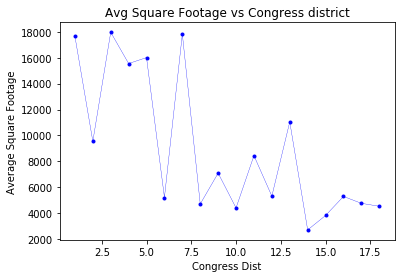

In [33]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(congbuavg["Square Footage per floor"], linewidth = 0.3, marker = '.',color = 'blue')
plt.xlabel('Congress Dist')
plt.ylabel('Average Square Footage')
plt.title('Avg Square Footage vs Congress district')

Overall, the plots are nice and descriptive 

Success : Did not face the scale issue in y axis in these plot. These are 

Shortcomings: These plots should be made more interactive and plotting can be done on the go for any different metrics 